# 线性回归
## 标准方程
![jupyter](./Norm.png)
选取MSE而非RMSE的原因是MSE计算简单且MSE最小时RMSE同样最小。

In [1]:
# 我们随机生成一些数据来测试该方程
import numpy as np
X=2*np.random.rand(100,1)

In [2]:
X[:10]

array([[1.22076873],
       [1.93172533],
       [0.09946856],
       [1.72660207],
       [1.15521984],
       [0.92343433],
       [1.39248211],
       [0.5964134 ],
       [1.41765538],
       [1.24670106]])

In [3]:
y=4+3*X+np.random.randn(100,1)

In [4]:
y[:10]

array([[ 8.6213014 ],
       [10.63843399],
       [ 3.49396353],
       [ 9.18748572],
       [ 7.95998153],
       [ 6.90625663],
       [ 8.59698103],
       [ 5.27014699],
       [ 7.36627427],
       [ 6.80312737]])

In [5]:
import matplotlib.pyplot as plt

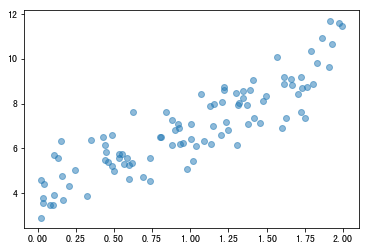

In [6]:
plt.scatter(x=X,y=y,alpha=0.5)
plt.show()

我们用标准方程来计算θ

In [7]:
X_b=np.c_[np.ones((100,1)),X] # add x0=1 to each instance

In [8]:
X_b[:10]

array([[1.        , 1.22076873],
       [1.        , 1.93172533],
       [1.        , 0.09946856],
       [1.        , 1.72660207],
       [1.        , 1.15521984],
       [1.        , 0.92343433],
       [1.        , 1.39248211],
       [1.        , 0.5964134 ],
       [1.        , 1.41765538],
       [1.        , 1.24670106]])

In [9]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[3.93975179],
       [2.98911609]])

由于我们拟合的方程是y=4+3*x1+高斯噪声，其原本形式是y=θ0+θ1*X+高斯噪声。变形式为y=θ0*x0+θ1*x1+高斯噪声，相当于x0均为1。想计算出两个θ，必须补充x0=1。从数据上看两个theta的拟合已经非常接近了，但由于高斯噪声存在，所以不可能完全拟合。

In [11]:
# 现在可以用theta做预测
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
X_new_b[:10]

array([[1., 0.],
       [1., 2.]])

In [12]:
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.93975179],
       [9.91798398]])

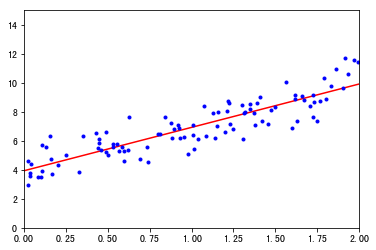

In [13]:
# 绘制出预测图像
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
# returns the current axes limits ``[xmin, xmax, ymin, ymax]``.::
plt.show()

In [14]:
# 使用sklearn计算线性回归非常简单
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.93975179]), array([[2.98911609]]))

## 计算复杂度
矩阵求逆的计算复杂度通常是O(n2.4)到O(n3)。

# 梯度下降
## 批量梯度下降

In [15]:
# 让我们看一下该算法的快速实现
eta=0.1 # learning rate
n_iterations=1000
theta=np.random.randn(2,1) # 随机初始化
m=100
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [16]:
theta

array([[3.93975179],
       [2.98911609]])

## 随机梯度下降
- 见书，算法永远不会停止。算法停下来的参数值肯定是足够好的，但不是最优的。当成本函数不规则时，随机梯度下降可以帮助跳出局部最小值，所以它对找到全局最小值更有优势。
- 随机性地缺点是永远定义不出最小值。可以用逐步降低学习率的方法来解决，这一过程称为模拟退火。

In [17]:
n_epochs=50
t0,t1=5,50 # 学习计划超参数
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1) # 随机初始化
m=100 # 100个训练数据
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        # xi 1*2
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

In [18]:
theta

array([[3.9710347 ],
       [3.01848299]])

## 小批量梯度下降
参照书上表格，梯度下降算法比较。

# 多项式回归

In [19]:
# 我们基于一个简单的二次方程生成一些非线性数据。
m=100 # m个数据，n个特征
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

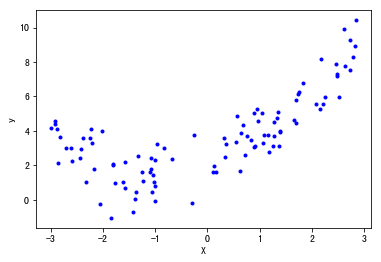

In [20]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

使用PolynomialFeatures类进行数据转换，将训练集中的每个特征的平方项添加为新特征。

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

In [22]:
X_poly[0]

array([-1.58838586,  2.52296965])

In [23]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.coef_,lin_reg.intercept_

(array([[1.01037534, 0.5001544 ]]), array([2.090504]))

可以看出系数基本相似。PolynomialFeatures(degree=d),可以将一个包含n个特征的数组，转换成包含(n+d)!/d!n!个特征的数组。例如 degre=3，且有两个特征a和b，即生成a3 b3 a2 b2 ab a2b ab2

# 学习曲线
下面这段代码在给定训练集上定义了一个函数，绘制模型的学习曲线。

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [25]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):# 训练集大小从1到len-1
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_true=y_train[:m],y_pred=y_train_predict))
        val_errors.append(mean_squared_error(y_true=y_val,y_pred=y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
    plt.legend()

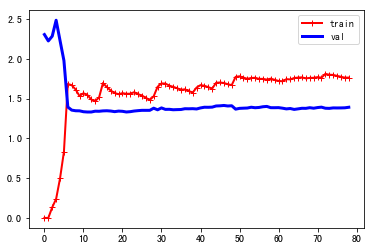

In [26]:
line_reg=LinearRegression()
plot_learning_curves(line_reg,X,y)

相同数据在十阶多项式上的表现

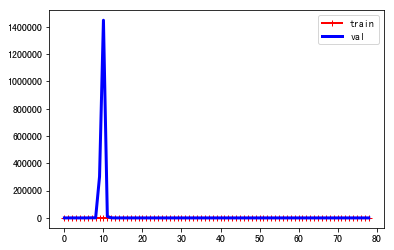

In [27]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([("poly_features",PolynomialFeatures(degree=10,include_bias=False)),("linear_reg",LinearRegression())])
plot_learning_curves(polynomial_regression,X,y)

# 正则化线性模型
## 岭回归
公式见书。在训练期间将正则化项添加到成本函数中。在训练完成后用非正则化性能度量来评估模型性能。

In [28]:
# 使用随机梯度下降法
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2")# l2正则化
sgd_reg.fit(X,y.ravel())# y.ravel返回一个扁平的数组
sgd_reg.coef_,sgd_reg.intercept_

(array([0.92403215]), array([3.63515122]))

In [29]:
sgd_reg.predict([[1.5]])

array([5.02119945])

书上图，a增加会导致更平坦（即不极端，更合理）的预测。

## Lasso回归
- 它增加的是权重向量的l1范数，而不是l2范数的平方的一半。
- Lasso一个重要特征是它倾向于消除最不重要特征的权重(也就是将它们设置为0)。见书上描述。

In [30]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.00624211])

可以使用SGDRegressor(penalty='l1')实现同样的效果

## 弹性网络
![jupyter](./Elasticnet.png)
弹性网络是介于岭回归和Lasso回归之间的中间地带。岭回归是个不错的默认选择，然而你觉得实际用到的特征只有几个，那么应该选择Lasso回归或者弹性网络。

In [31]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)# l1_ratio等于混合比r
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.00868836])

## 提前停止
- 同样是一个正则化方法
- 在验证误差达到最小值时停止训练
- 使用随机或者小批量梯度下降时，很难知道你是否达到了最小值。其中一种解决方法是仅在验证误差超过最小值一段时间后停止。

In [32]:
# 一个基本实现
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train,X_val,y_train,y_val=train_test_split(X,y.ravel(),test_size=0.2)
poly_scaler=Pipeline([("poly_features",PolynomialFeatures(degree=90,include_bias=False)),("std_scaler",StandardScaler())])
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

In [33]:
sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)
#  max iter=1 The maximum number of passes over the training data (aka epochs).
# tol The stopping criterion.当（loss > previous_loss - tol）时，迭代就会停止。
# eta0 当learning_rate为'constant'或者'invscaling'时的初始学习率。默认值为0.0。
# warm_start 当设置为true时，将重用之前调用的结果来拟合作为初始化的值。否则将擦除之前调用的结果。

In [34]:
minimum_val_error=float("inf")
best_epoch=None
best_model=None

In [35]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

In [36]:
best_epoch,best_model

(248,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

# 逻辑回归
## 训练和成本函数
![jupyter](./Logistic-1.png)
![jupyter](./Logistic-3.png)
![jupyter](./Logistic-2.png)
该成本函数没有闭式方程(标准方程),但是该函数是个凸函数，可以采用梯度下降方法。

## 决策边界

In [37]:
# 仅基于花瓣宽度这一特征，创建一个分类器来检测维吉尼亚鸢尾花
from sklearn.datasets import load_iris
iris=load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [38]:
X=iris.data[:,3:]# petal width
y=(iris["target"]==2).astype(np.int)

In [39]:
X,y

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.1],
        [0.1],
        [0.2],
        [0.4],
        [0.4],
        [0.3],
        [0.3],
        [0.3],
        [0.2],
        [0.4],
        [0.2],
        [0.5],
        [0.2],
        [0.2],
        [0.4],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.1],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.3],
        [0.3],
        [0.2],
        [0.6],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [1.4],
        [1.5],
        [1.5],
        [1.3],
        [1.5],
        [1.3],
        [1.6],
        [1. ],
        [1.3],
        [1.4],
        [1. ],
        [1.5],
        [1. ],
        [1.4],
        [1.3],
        [1.4],
        [1

In [40]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [41]:
# 让我们看看花瓣宽度在0-3cm之间的鸢尾花，模型估算出来的概率
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)

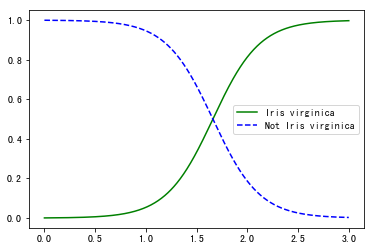

In [42]:
plt.plot(X_new,y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris virginica')
plt.legend()
plt.show()

对于花瓣宽度低于1cm一下的，分类器可以确定不是：而对于花瓣宽度大于2cm的，分类器可以确定是。但是在两个极端之间，分类器则不太有把握。

In [43]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

如果用两个特征来预测，效果就会好些。逻辑回归默认添加l2惩罚项。

## softmax回归
多元逻辑回归。每个类都有自己特定的向量参数θ。
![jupyter](./softmax.jpg)
s(x)是每个类的分数。softmax函数得出的是属于某个类的概率。

交叉熵成本函数。当模型对目标类作出较低概率的估算时会受到惩罚。其中yik一般等于0或者1。
![jupyter](./cross_entropy.jpg)
log函数图像
![jupyter](./log.gif)

In [44]:
# 将multi_class设置为multinomial使用交叉熵作为成本函数.同时还必须指定一个softmax求解器,具体区别见官方文档。默认使用l2正则化。C是正则化参数的倒数。
X=iris.data[:,(2,3)]
y=iris.target

In [45]:
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [46]:
softmax_reg.predict([[5,2]])

array([2])

In [47]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])